<a href="https://colab.research.google.com/github/inhoblock/Data_science-Study/blob/main/Chapter03_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter3_2

Linear Regression

# 데이터 입력 및 훈련

In [2]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

K - Neighbors Regression 모델로 훈련

In [7]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

50cm (1500g) 인 농어 데이터를 입력하면 몇 g 으로 예측할까?

In [8]:
print(knr.predict([[50]]))

[1033.33333333]


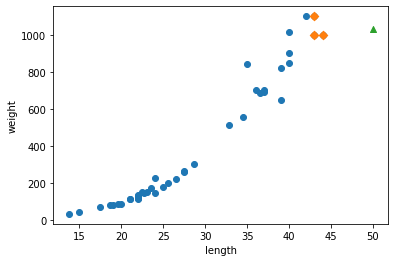

In [9]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
plt.scatter(50, 1033, marker = '^') # 50cm 농어
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

50(length) 근처 데이터들이 멀리 떨어져있기 때문에 실제 농어의 무게 1500g 보다 훨씬 작은 1033g이 나옴.

[mark] 50보다 더 큰 데이터를 입력해도 항상 1033g이 나옴

# Linear Regression (선형 회귀)

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.predict([[50]]))

[1241.83860323]


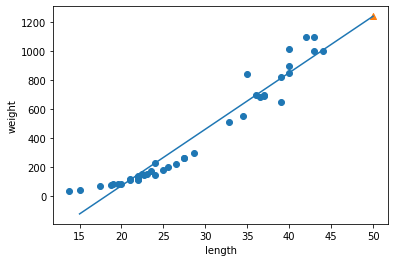

In [11]:
plt.scatter(train_input, train_target)
plt.plot([15,50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])
plt.scatter(50, 1241.8, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [12]:
print(lr.score(train_input, train_target))
print((lr.score(test_input, test_target)))

0.9398463339976039
0.8247503123313558


knr보다는 나아졌지만, 여전히 무게가 적게나오고 길이가 작은 농어들의 무게가 음수임. ( 과소적합 )

곡선을 따라 회귀시킬 수 있을까?

# Polynomial Regression (다항 회귀)

In [15]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))

[1573.98423528]


**$x^2$ 를 하나의 feature로 취급함으로써 선형성을 유지할 수 있음.**

<function matplotlib.pyplot.show>

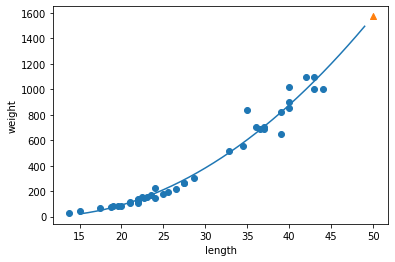

In [21]:
point = np.arange(15, 50)

plt.scatter(train_input, train_target)
plt.plot(point, lr.coef_[0]*(point**2) + lr.coef_[1] * point + lr.intercept_)
plt.scatter([50], [1574], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show

In [22]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


다항 회귀 결과 50cm 농어 데이터의 결과값도 훨씬 좋아졌고, 테스트 데이터의 점수도 좋아졌다.

(그러나 여전히 과소적합 상태이다.)